In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv("application_record.csv")

In [47]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [48]:
plt.figure(figsize=(12,8))

# REMOVE UNEMPLOYED PEOPLE
employed = df[df['DAYS_EMPLOYED']<0]

employed['DAYS_EMPLOYED'] = employed["DAYS_EMPLOYED"] * -1
employed['DAYS_BIRTH'] = employed["DAYS_BIRTH"] * -1

/tmp/ipykernel_11970/3022935407.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employed['DAYS_EMPLOYED'] = employed["DAYS_EMPLOYED"] * -1
/tmp/ipykernel_11970/3022935407.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employed['DAYS_BIRTH'] = employed["DAYS_BIRTH"] * -1


<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='DAYS_BIRTH', ylabel='DAYS_EMPLOYED'>

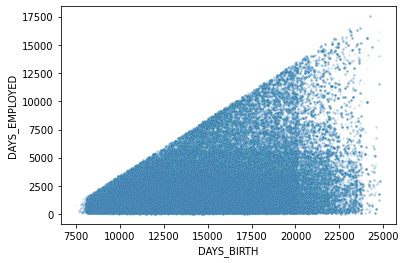

In [49]:
sns.scatterplot(x='DAYS_BIRTH',y="DAYS_EMPLOYED",data=employed, alpha=0.1, s=5)

In [66]:
# Distrubtion Plot
df['YEARS_OLD'] = -1 * df["DAYS_BIRTH"] / 365

In [67]:
df['YEARS_OLD']

0         32.890411
1         32.890411
2         58.832877
3         52.356164
4         52.356164
            ...    
438552    62.238356
438553    43.668493
438554    22.380822
438555    59.378082
438556    51.665753
Name: YEARS_OLD, Length: 438557, dtype: float64

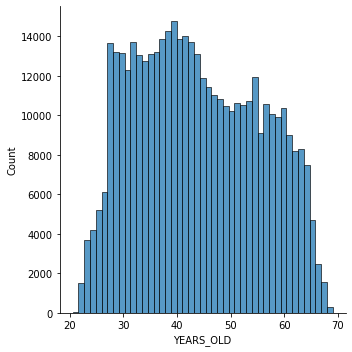

In [68]:
sns.displot(data=df,x="YEARS_OLD",lw=2,bins=45)

In [69]:
df['AMT_INCOME_TOTAL'].median()

160780.5

In [72]:
bottom_half = df.nsmallest(n=int(.5 * len(df)), columns="AMT_INCOME_TOTAL")

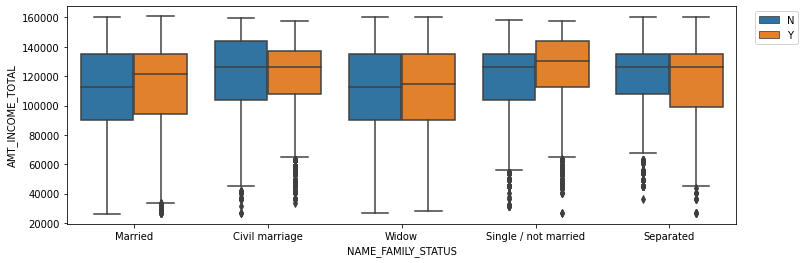

In [81]:
plt.figure(figsize=(12,4))
sns.boxplot(data=bottom_half,y="AMT_INCOME_TOTAL",x="NAME_FAMILY_STATUS",hue="FLAG_OWN_REALTY")
plt.legend(bbox_to_anchor=(1.1,1))

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,YEARS_OLD
ID,1.000000,-0.005178,0.011179,-0.004994,-0.002467,NaN,-0.023319,-0.018992,0.032875,-0.001862,0.004994
CNT_CHILDREN,-0.005178,1.000000,0.019177,0.349088,-0.241535,NaN,0.038418,-0.038266,0.028457,0.884781,-0.349088
AMT_INCOME_TOTAL,0.011179,0.019177,1.000000,0.053775,-0.141291,NaN,-0.033635,0.004444,0.112139,0.011454,-0.053775
DAYS_BIRTH,-0.004994,0.349088,0.053775,1.000000,-0.617908,NaN,0.171829,-0.037984,0.096752,0.306179,-1.000000
DAYS_EMPLOYED,-0.002467,-0.241535,-0.141291,-0.617908,1.000000,NaN,-0.232208,0.004868,-0.074372,-0.234373,0.617908
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_WORK_PHONE,-0.023319,0.038418,-0.033635,0.171829,-0.232208,NaN,1.000000,0.290066,-0.060915,0.049777,-0.171829
FLAG_PHONE,-0.018992,-0.038266,0.004444,-0.037984,0.004868,NaN,0.290066,1.000000,-0.001170,-0.024213,0.037984
FLAG_EMAIL,0.032875,0.028457,0.112139,0.096752,-0.074372,NaN,-0.060915,-0.001170,1.000000,0.022054,-0.096752
CNT_FAM_MEMBERS,-0.001862,0.884781,0.011454,0.306179,-0.234373,NaN,0.049777,-0.024213,0.022054,1.000000,-0.306179


<AxesSubplot:>

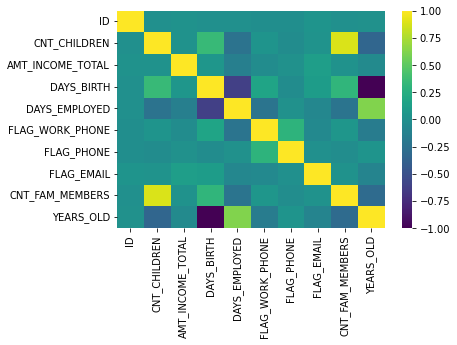

In [87]:
sns.heatmap(df.drop('FLAG_MOBIL',axis=1).corr(),cmap='viridis')